### Importing dependencies and set configurations

In [8]:
import re
import pandas as pd 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import spacy    
import spacy_transformers
nlp = spacy.load('en_core_web_trf')
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import decomposition
import numpy as np 
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.express as px # pip install plotly
import matplotlib.pyplot as plt # pip install matplotlib
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'browser'
import textwrap
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

df = pd.read_csv("../dataset/_compiled/Clustered.csv")

### Tokenization, TF-IDF Vectorization, LDA Topic Modelling

In [3]:
def remove_punctuation(cell):
    return re.sub(r"[^\w\s]", "", cell) 

def my_tokenizer(text):
    # 1-gram tokens of more than a character
    word_tokens = [x for x in word_tokenize(text) if len(x) > 2]
    # remove stop words 
    filtered_tokens = [word for word in word_tokens if word not in set([remove_punctuation(x) for x in [*stopwords.words('english'), *nlp.Defaults.stop_words, *[str(x) for x in open("stop_words.txt", "r").read().split(" ")]]])]
    # lemmatize the tokens 
    # lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return filtered_tokens

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

# Vectorize using TF-IDF

tf_vectorizer = TfidfVectorizer(tokenizer=my_tokenizer,
                                min_df = 3, max_df=0.8, max_features=25000, 
                                use_idf=True, norm=None, token_pattern=None)
tf_vectors = tf_vectorizer.fit_transform(df["Translated"])  

# Topic Modelling using LDA

n_topics = 5
lda = decomposition.LatentDirichletAllocation(n_components=n_topics, max_iter=35, 
                                              learning_method='online', learning_offset=55, n_jobs=1, random_state=420)
W = lda.fit_transform(tf_vectors)
H = lda.components_

In [54]:
# Show top 100 relevant words for each topic

num_words = 50
vocab = np.array(tf_vectorizer.get_feature_names_out())
top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H])
topics = [' '.join(t) for t in topic_words]
df_topics = pd.DataFrame(topics, columns=['Keywords'])
df_topics['Topic ID'] = range(1, len(topics) + 1)

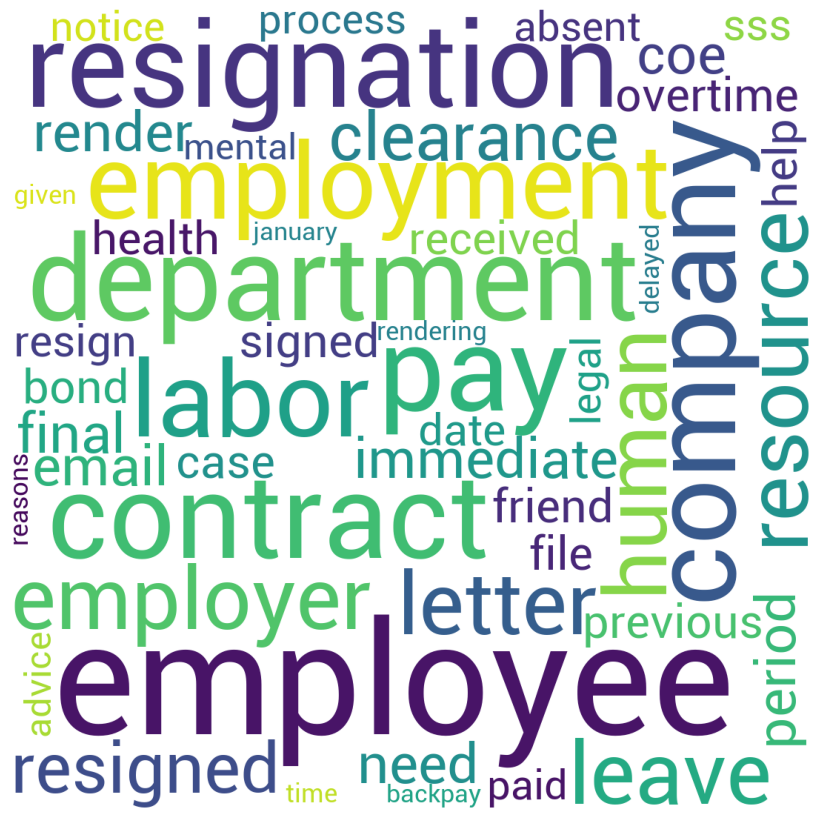

In [55]:
wordcloud = WordCloud(width = 1080, height = 1080,
                background_color ='white',
                font_path='https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Regular.ttf',
                min_font_size = 12).generate(topics[0])
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

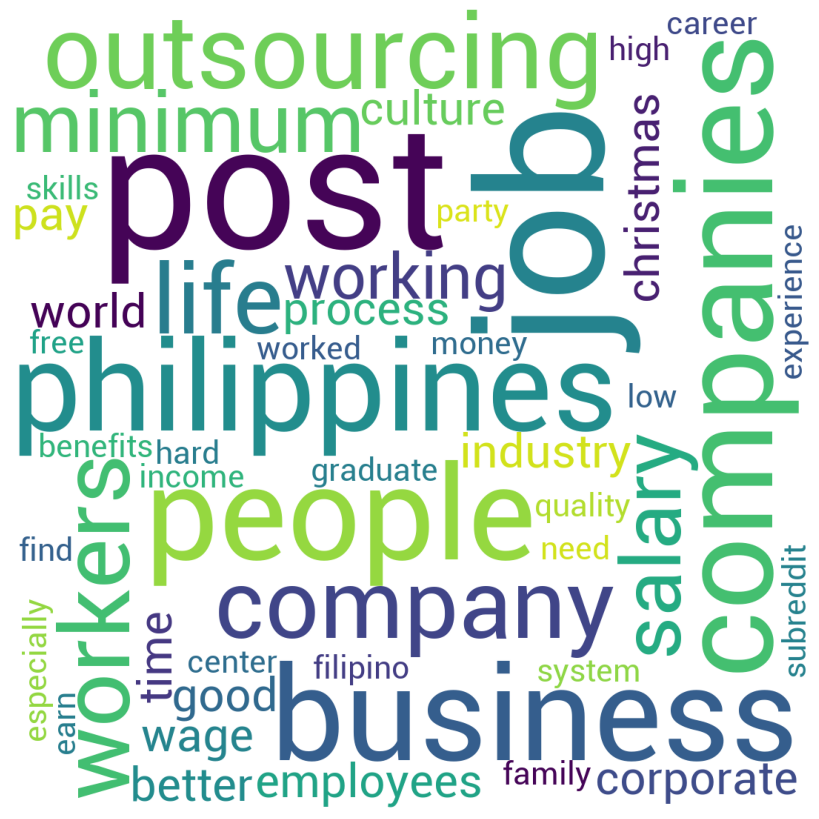

In [72]:
wordcloud = WordCloud(width = 1080, height = 1080,
                background_color ='white',
                font_path='https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Regular.ttf',
                min_font_size = 12, max_font_size=235).generate(topics[1])
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

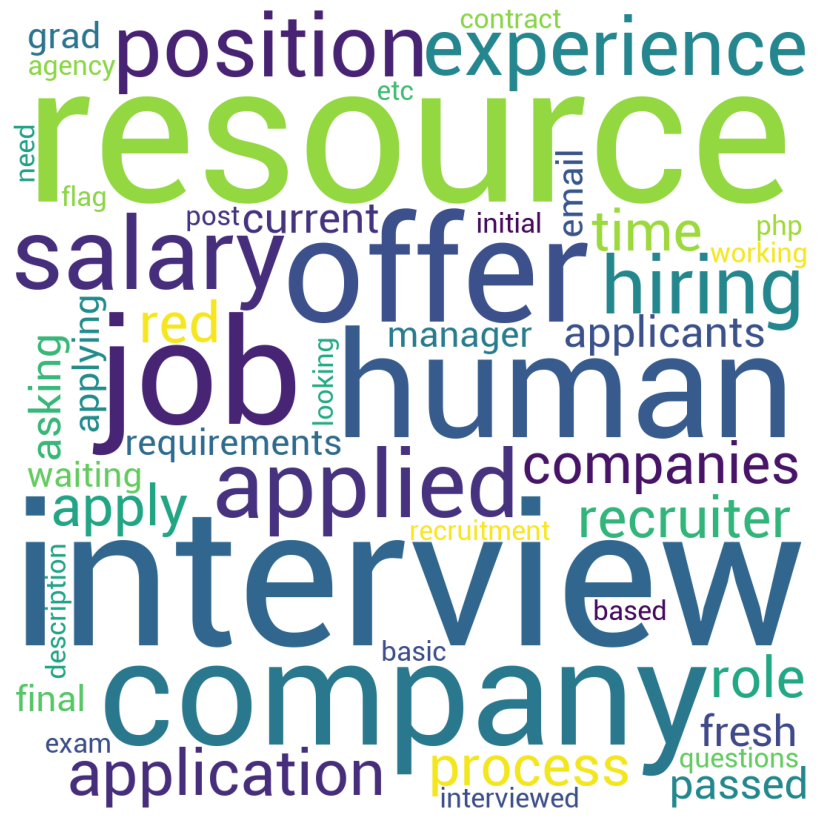

In [57]:
wordcloud = WordCloud(width = 1080, height = 1080,
                background_color ='white',
                font_path='https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Regular.ttf',
                min_font_size = 12).generate(topics[2])
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

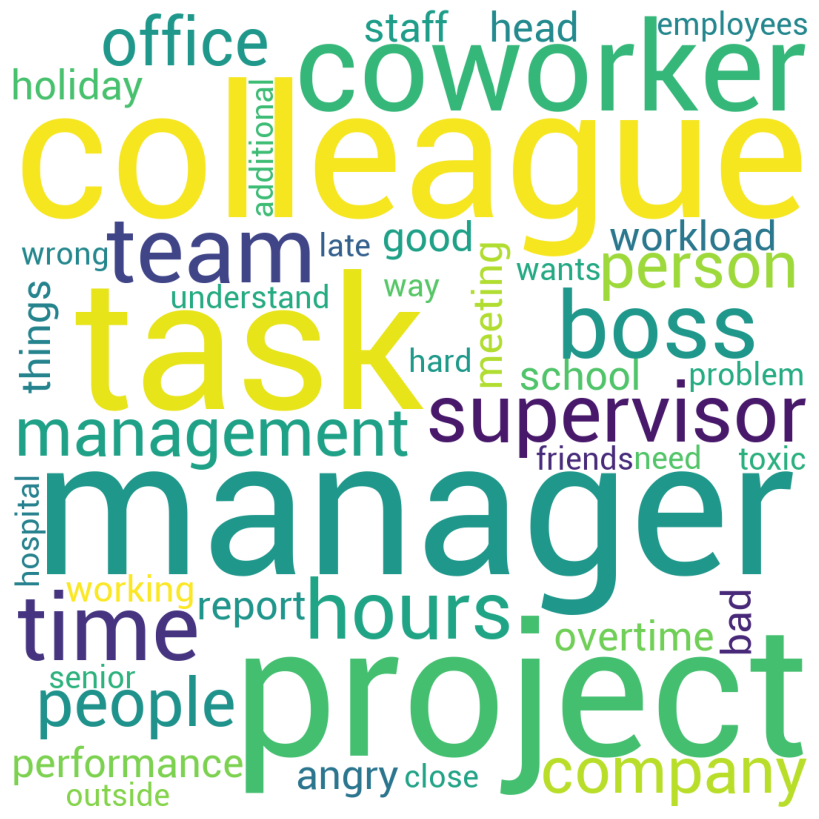

In [90]:
wordcloud = WordCloud(width = 1080, height = 1080,
                background_color ='white',
                font_path='https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Regular.ttf',
                min_font_size = 12).generate(topics[3])
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

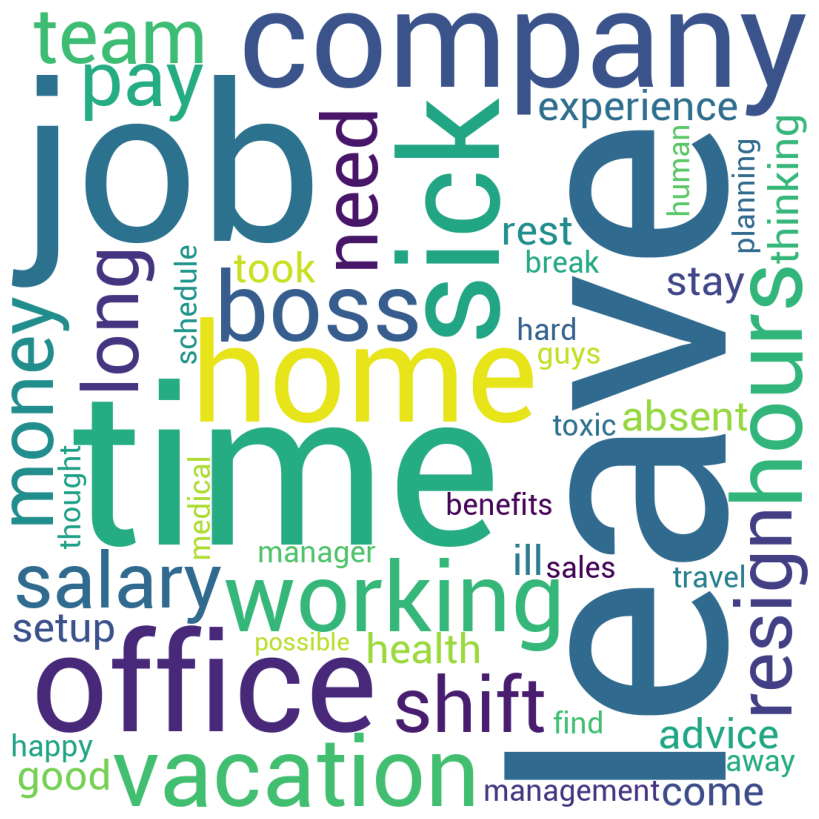

In [92]:
wordcloud = WordCloud(width = 1080, height = 1080,
                background_color ='white',
                font_path='https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Regular.ttf',
                min_font_size = 12).generate(topics[4])
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [6]:
# Assign topic to each submision
topicid = ["Topic " + str(i+1) for i in range(lda.n_components)]
postid = ["Submission " + str(i+1) for i in range(len(df["Translated"]))]

df_topics_lda = pd.DataFrame(np.round(W,2), columns=topicid, index=postid)
significanttopic = np.argmax(df_topics_lda.values, axis=1)+1

df_topics_lda['dominant_topic'] = significanttopic
df_topics_lda['breakdown'] = df_topics_lda.apply(lambda row: '\n'.join([f'{col}: {row[col]}' 
                                                        for col in sorted(df_topics_lda.columns, key=lambda x: row[x], reverse=True) 
                                                        if row[col] > 0 and col != 'dominant_topic']), axis=1)
df_topics_lda.head(5)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,dominant_topic,breakdown
Submission 1,0.99,0.00,0.00,0.00,0.00,1,Topic 1: 0.99
Submission 2,0.00,0.00,0.61,0.00,0.39,3,Topic 3: 0.61\nTopic 5: 0.39
Submission 3,0.00,0.00,0.00,0.00,0.99,5,Topic 5: 0.99
Submission 4,0.00,0.33,0.08,0.59,0.00,4,Topic 4: 0.59\nTopic 2: 0.33\nTopic 3: 0.08
Submission 5,0.13,0.00,0.00,0.00,0.86,5,Topic 5: 0.86\nTopic 1: 0.13


### t-SNE Clustering and Dimensionality Reduction

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=120, perplexity=37, angle=0.8)
tsne_result = tsne.fit_transform(df_topics_lda.iloc[:,:n_topics])

# Create a new dataframe with t-SNE coordinates and cluster labels
def split_text(text, max_length):
  lines = textwrap.wrap(text, width=max_length, break_long_words=False)
  return "<br>".join(lines)

df_topics_cluster = pd.DataFrame({
                                  'LDA Topic': df_topics_lda.reset_index()['dominant_topic'].astype(str), # topics via LDA
                                  'Hovertext': df["Translated"],
                                  'Breakdown': df_topics_lda.reset_index()['breakdown'],
                                  'X': tsne_result[:, 0],
                                  'Y': tsne_result[:, 1]
                                })

df_topics_cluster['Hovertext'] = df_topics_cluster['Hovertext'].apply(lambda x: split_text(x, 40))
df_topics_cluster['Breakdown'] = df_topics_cluster['Breakdown'].str.replace('\n','<br>')

df_topics_cluster = pd.concat([df, df_topics_cluster], axis=1)



# df_top_10 = df_topics_cluster.sort_values('Engagements', ascending=False).groupby('LDA Topic').head(10)

### Nutshell Plot

In [ ]:
# Plot submissions as colored points
df_topics_cluster.sort_values('LDA_Topic', key=lambda x: pd.to_numeric(x, errors='coerce'), inplace=True)

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#785ef0', '#dede00']

Design_Book=[
              '#ffb000', 
              '#785ef0', 
              '#dc267f', 
              '#fe6100', 
              '#57c4ff', 
              '#00cc96', 
              '#bcbd21', 
              '#a65628', 
              '#dede00',
              '#984ea3',
            ]

fig = px.scatter(df_topics_cluster, x='X', y='Y', color='LDA_Topic', 
                 title='Topic Clustering using LDA and t-SNE',
                 hover_name='Hovertext',
                 size='Engagements',
                 color_discrete_sequence=Design_Book,
                 hover_data={'X':False, 'Y':False, 'LDA_Topic':False, 'Hovertext':False, 'Breakdown':True})

fig.add_annotation(
    x=0,
    y=-0.2*(1/10)-0.15,
    text="Top 10 Most Frequent Keywords per Topic",
    showarrow=False,
    xref='paper',
    yref='paper',
    align='left',
    font=dict(color='white', family='Arial', size=16, weight='normal')
  )

for i, keyword in enumerate(df_topics['Keywords']):
  fig.add_annotation(
    x=0,
    y=-0.2*(i/5)-0.25,
    text="Topic %d: %s"%(i+1, keyword.replace(' ', ', ')),
    showarrow=False,
    xref='paper',
    yref='paper',
    align='left',
    font=dict(color=fig.data[i].marker['color'], family='Arial', size=16, weight='normal')
  )

SIZE_MULTIPLIER = 1

fig.update_traces(mode='markers', 
                  opacity=1,
                  marker=dict(
                    sizemode='area',
                    sizeref=2.*max(df['Engagements'])/((130*(SIZE_MULTIPLIER))**2), 
                    line_color='#1a181c',
                    line_width=2),
                  )

fig.update_layout(height=1080*SIZE_MULTIPLIER,
                  width=1480*SIZE_MULTIPLIER,
                  xaxis=dict(
                    gridwidth=2,
                    title='',
                    color='gray',
                  ),
                  yaxis=dict(
                    gridwidth=2,
                    title='',
                    color='gray',
                  ),
                  margin=dict(b=360*SIZE_MULTIPLIER),
                  title=dict(font=dict(color='white', family='Roboto', size=24, weight='bold')),
                  showlegend=False, 
                  paper_bgcolor='#1a181c',
                  plot_bgcolor='#1a181c',
                )

fig.update_xaxes(showline=True, 
                 linewidth=2, 
                 linecolor='#232024', 
                 gridcolor='#232024', 
                 zerolinecolor='#232024',
                 title_font_color="white")

fig.update_yaxes(showline=True,
                 linewidth=2, 
                 linecolor='#232024', 
                 gridcolor='#232024', 
                 zerolinecolor='#232024',
                 title_font_color="#FFFFFF")
                

# !pip install nbformat
# restart kernel
pio.show(fig)

NameError: name 'df_topics_cluster' is not defined

### RQ 1

In [ ]:
# df_topics_cluster['Date'] = pd.to_datetime(df_topics_cluster['Timestamp'], unit='s').dt.to_period('M')
# df_topics_cluster = df_topics_cluster.sort_values(by='Timestamp')

# total_count = df_topics_cluster.groupby('Date').nunique()
# total_count = total_count['Submission'].cumsum()
# cumulative_count = df_topics_cluster.groupby(['Date','Cluster']).nunique()
# cumulative_count = cumulative_count.pivot_table('Submission', 'Date', 'Cluster').fillna(0).cumsum()

# rel_freq = cumulative_count.div(total_count, axis=0)
# rel_freq = rel_freq.stack(0).reset_index()
# rel_freq.columns = ['Date', 'Cluster', 'Relative Frequency']
# rel_freq['Date'] = [x.strftime('%b %Y') for x in rel_freq['Date']]

# monthly_count = df_topics_cluster.groupby(['Date','Cluster']).size()
# monthly_count = monthly_count.reset_index()
# monthly_count.columns = ['Date', 'Cluster', 'Frequency']
# monthly_count['Date'] = [x.strftime('%b %Y') for x in monthly_count['Date']]

# cumulative_count = cumulative_count.stack(0).reset_index()
# cumulative_count.columns = ['Date', 'Cluster', 'Frequency']
# cumulative_count['Date'] = [x.strftime('%b %Y') for x in cumulative_count['Date']]

In [ ]:
# fig = px.area(monthly_count, x='Date', y='Frequency', color='Cluster',
#               title='Relative Frequency vs Time',
#               color_discrete_sequence=Design_Book,
#               labels={'Relative_Frequency': 'Relative Frequency', 'Date': 'Date'}
#             )

# fig.update_xaxes(nticks=7)

# fig.update_layout(height=1080,
#                   width=2160,
#                   xaxis=dict(
#                     gridwidth=2,
#                     title='',
#                     color='gray',
#                   ),
#                   yaxis=dict(
#                     gridwidth=2,
#                     title='',
#                     color='gray',
#                   ),
#                   title=dict(font=dict(color='white', family='Roboto', size=24, weight='bold')),
#                   legend=dict(title="Topic", font=dict(color='white', family='Roboto', size=16, weight='normal')),
#                   paper_bgcolor='#1a181c',
#                   plot_bgcolor='#1a181c',
#                 )

# fig.update_xaxes(showline=True, 
#                  linewidth=2, 
#                  linecolor='#232024', 
#                  gridcolor='#232024', 
#                  zerolinecolor='#232024',
#                  title_font_color="white")

# fig.update_yaxes(showline=True,
#                  linewidth=2, 
#                  linecolor='#232024', 
#                  gridcolor='#232024', 
#                  zerolinecolor='#232024',
#                  title_font_color="#FFFFFF")

# # Show the plot
# # fig.show()

### RQ 2